<!-- Styled Header -->
<div style="background-color:#F4F4F4; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">
    <img src="C:\\Users\\aashi\\OneDrive\\Desktop\\Logo-Universita-di-Messina.jpg" alt="University Logo" style="float:left; margin-right: 20px; width: 100px; height: 100px;">
    <h1 style="color:#002F6C; text-align:center;">Analysis of Physiological Signals</h1>
   <h3 style="color:#002F6C; text-align:center;">Using ECG Data for Health Indicator Measurement</h3>
   <p style="font-style: italic; color:#002F6C; text-align:center;">Research Project by Luca, Amnaa Arojj, and Aashik</p>
   <p style="font-style: italic; color:#002F6C; text-align:center;">Affiliation: Università degli Studi di Messina</p>
   <hr style="border: 1px solid #002F6C;">
   <div style="display: flex; justify-content: space-between; margin-top: 15px;">
      <div>
         <p><strong style="color:#002F6C;">Project Advisors:</strong></p>
         <p style="color:#002F6C;">Prof. Massimo Vellari (Full Professor and ICT Researcher)</p>
         <p style="color:#002F6C;">Phone: 090-6765342</p>
         <p style="color:#002F6C;">Email: massimo.vellari@unime.it</p>
      </div>
      <div style="margin-left: auto;">
         <p><strong style="color:#002F6C;">Academic Department:</strong></p>
         <p style="color:#002F6C;">Statistical Department</p>
         <p style="color:#002F6C;">Prof. David Barilla</p>
         <p style="color:#002F6C;">Phone: 090-6764505</p>
         <p style="color:#002F6C;">Email: dbarilla@unime.it</p>
      </div>
   </div>
   <hr style="border: 1px solid #002F6C;">
   <p style="color:#002F6C; text-align:center;">Date: July 10th, 2023</p>
</div>


# Research Project Overview

This research study aimed to investigate the physiological responses of the cardiovascular (related to the heart and blood vessels), respiratory (related to breathing), and electrodermal (related to skin conductance) systems when exposed to positive stimuli of varying levels of intensity. The study focused on understanding how different levels of positive emotions, specifically those associated with high approach and low approach tendencies, could potentially moderate or influence the body's stress responses.

The study also examined whether the body's reactions to a high approach negative emotion like anger, as opposed to a perceived threat, would interact with the presence of high approach positive emotions. In other words, they wanted to see if feeling strong positive emotions would change how the body responds to feeling angry or threatened.

In summary, the research sought to explore the connections between emotional responses, stress reactions, and the interplay of positive and negative emotions with varying degrees of intensity.


In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [3]:
from scipy.signal import find_peaks
from scipy.stats import kurtosis, skew

from xgboost import XGBClassifier

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



In [4]:
# data
df = pd.read_csv("C:\\Users\\aashi\\Downloads\\Dataframe_Study2_ECGsignal.csv")

# Data cleaning 
df = df.dropna()
df = df[df['Label'] != -1] 

# Adding columns for phase of data collection
df['Phase'] = np.select([df['Label'] == 209, df['Label'] == 208, df['Label'] == 308,
                         df['Label'] == 309], ['Anger', 'Threat', 'Low Approach', 'High Approach'], default='Neutral')
                         
# Adding columns for time steps
df['Time'] = df.groupby('Patien ID').cumcount()

# Summary statistics
print(df.shape)
print(df.describe())


(372, 33)
        Patien ID  NNI counter     NNI mean     HR mean      HR std  \
count  372.000000   372.000000   372.000000  372.000000  372.000000   
mean    93.500000   240.083333   760.400285   81.195129    6.073735   
std     53.765113    36.246402   114.615071   12.189433    2.386638   
min      1.000000   148.000000   485.635870   50.842676    1.656220   
25%     47.000000   214.000000   682.778626   72.455056    4.250916   
50%     93.500000   237.000000   753.719409   80.175138    5.646445   
75%    140.000000   262.000000   834.697040   88.291495    7.447771   
max    186.000000   368.000000  1204.959459  124.129109   15.985902   

       NNI diff mean        SDNN       RMSSD        SDSD       pnn50  ...  \
count     372.000000  372.000000  372.000000  372.000000  372.000000  ...   
mean       27.007500   57.039787   36.071458   23.579546   14.021769  ...   
std        16.040053   23.720829   21.845638   15.476051   14.629551  ...   
min         3.709091   17.205926    5.0139

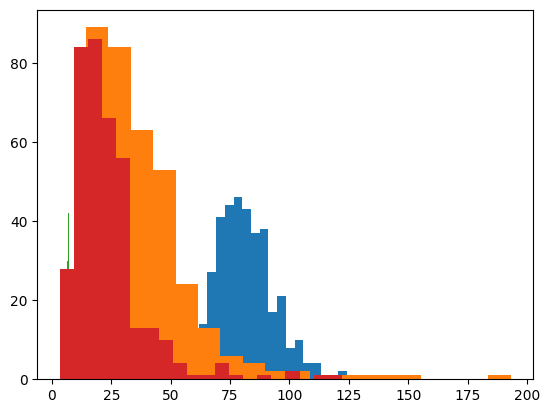

In [5]:

# Visualize the distribution of some features
plt.hist(df['HR mean'], bins=20)
plt.hist(df['RMSSD'], bins=20)
plt.hist(df['Welch LogPower LF'], bins=20)
plt.hist(df['SDSD'], bins=20)
plt.show() 

C:\Users\aashi\AppData\Local\Temp\ipykernel_9416\3551910505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HR mean'], ax=axs[0,0])
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

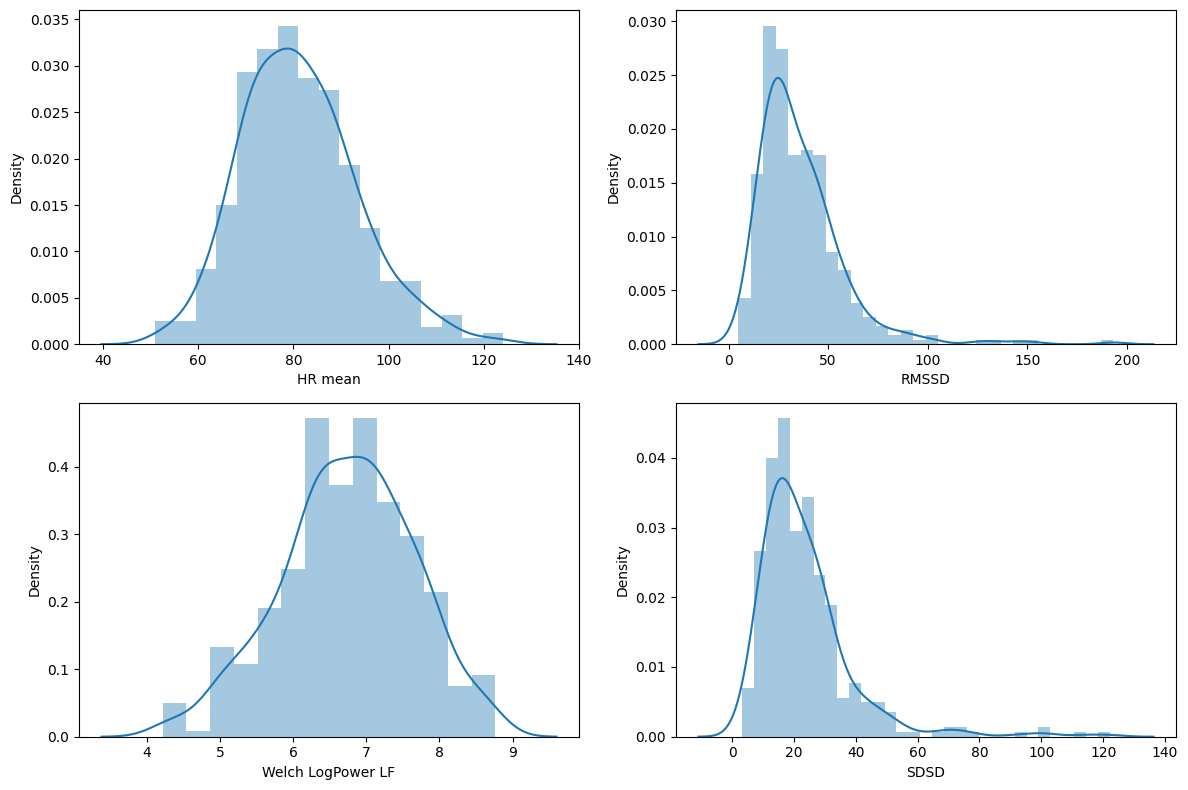

In [6]:
# Distribution plots
fig, axs = plt.subplots(2, 2, figsize=(12,8))
sns.distplot(df['HR mean'], ax=axs[0,0])
sns.distplot(df['RMSSD'], ax=axs[0,1])
sns.distplot(df['Welch LogPower LF'], ax=axs[1,0])
sns.distplot(df['SDSD'], ax=axs[1,1])
plt.tight_layout()
plt.show()

<Axes: >

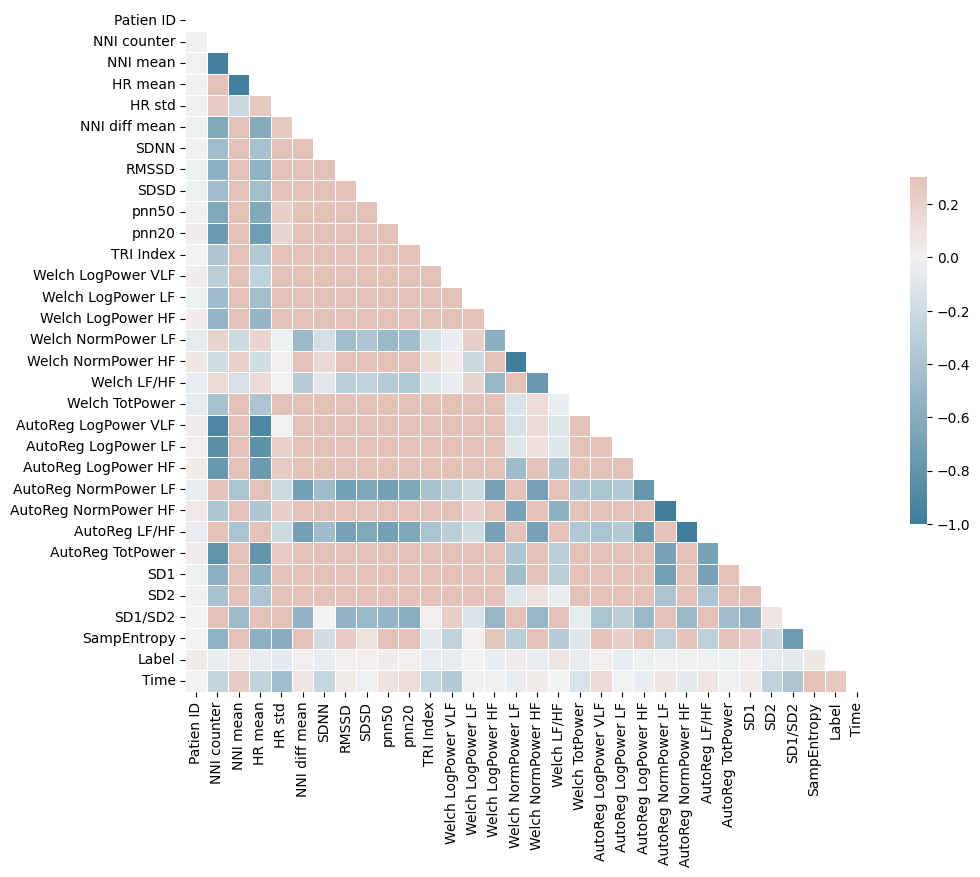

In [7]:
# Exclude non-numeric columns from correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
from sklearn.impute import SimpleImputer 

In [9]:
# Time series features
df['NNI_diff1'] = df['NNI counter'].diff(periods=1).fillna(0)
df['HR_diff1'] = df['HR mean'].diff(periods=1).fillna(0)

# Frequency domain features
peaks, _ = find_peaks(df['Welch LogPower LF'])
df['LF_peaks'] = peaks.shape[0]

# Non-linear dynamics features
df['HR_kurtosis'] = df['HR mean'].rolling(5).kurt()
df['HR_skew'] = df['HR mean'].rolling(5).skew()

# Normalize features
scaler = StandardScaler()
features_to_normalize = ['NNI mean', 'HR mean', 'HR std', 'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD',
                        'TRI Index', 'Welch LogPower LF', 'Welch LogPower HF', 'Welch LF/HF',
                        'AutoReg LogPower LF', 'AutoReg LogPower HF', 'AutoReg LF/HF',
                        'SD1', 'SD2', 'SD1/SD2', 'NNI_diff1', 'HR_diff1', 'LF_peaks',
                        'HR_kurtosis', 'HR_skew']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])



In [10]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df[features_to_normalize] = imputer.fit_transform(df[features_to_normalize])



In [11]:
# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df[features_to_normalize])

# K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)
df['Cluster'] = kmeans.predict(X_pca)

# GMM clustering
gmm = GaussianMixture(n_components=5)
gmm.fit(X_pca)
df['GMM Cluster'] = gmm.predict(X_pca)

# Compare clusters
print(df.groupby('Cluster')['Phase'].value_counts())
print(df.groupby('GMM Cluster')['Phase'].value_counts())

C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster  Phase        
0        Low Approach     30
         Anger            21
         Neutral          21
         High Approach    20
         Threat           15
1        Anger            17
         Threat           15
         Low Approach      1
2        Anger            14
         Threat           12
         High Approach     7
         Neutral           7
         Low Approach      4
3        Threat           27
         Anger            20
         Low Approach      6
         Neutral           5
         High Approach     4
4        High Approach    30
         Neutral          27
         Low Approach     24
         Anger            23
         Threat           22
Name: count, dtype: int64
GMM Cluster  Phase        
0            Anger            46
             Threat           37
             Low Approach     25
             High Approach    19
             Neutral          15
1            High Approach    27
             Neutral          26
             Low Approach 

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
# Assuming 'df' is our DataFrame and 'Patient ID' and 'HR mean' are column names
patient1 = df[df['Patien ID'] == 1]

# Checking data type and reset index
patient1_hr = patient1['HR mean'].dropna().reset_index(drop=True)

# Fit ARIMA model with a different order of differencing (d=0)
model = ARIMA(patient1_hr, order=(2, 0, 0))  # Changed (2, 1, 0) to (2, 0, 0) because it does not fit the model before.
model_fit = model.fit()
print(model_fit.summary())

C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                               SARIMAX Results                                
Dep. Variable:                HR mean   No. Observations:                    2
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  10.077
Date:                Sun, 17 Sep 2023   AIC                            -12.154
Time:                        22:26:12   BIC                            -17.382
Sample:                             0   HQIC                           -23.086
                                  - 2                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0091   3.74e-11    2.7e+10      0.000       1.009       1.009
ar.L1         -1.0000   3.82e-08  -2.62e+07      0.000      -1.000      -1.000
ar.L2       2.248e-05   3.71e-08    605.362      0.0

C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


# SARIMAX Results

This section provides information about the ARIMA model and the statistical results of the fitting process.

## Model Information

- **Dependent Variable:** `HR mean` - This is the variable we are trying to model and forecast.
- **No. Observations:** 2 - The number of observations in our dataset for this specific patient.
- **Model:** ARIMA(2, 0, 0) - This indicates that the model used is an ARIMA model with the following parameters:
  - AR (AutoRegressive) order: 2
  - I (Integrated) order: 0 (The time series data does not require differencing)
  - MA (Moving Average) order: 0

## Summary Statistics

- **Log Likelihood:** 10.077 - This is a measure of how well the model fits the data. Higher values indicate a better fit.
- **AIC (Akaike Information Criterion):** -12.154 - AIC is used for model selection. Lower values indicate a better model fit while penalizing complex models.
- **BIC (Bayesian Information Criterion):** -17.382 - Similar to AIC, BIC helps in model selection, with lower values favoring simpler models.
- **HQIC (Hannan-Quinn Information Criterion):** -23.086 - Like AIC and BIC, HQIC is used for model selection, and lower values suggest better model fit.

## Coefficients

- **const:** 1.0091 - This is the constant or intercept term in the ARIMA model.
- **ar.L1:** -1.0000 - This is the coefficient for the first lag of the autoregressive component.
- **ar.L2:** 2.248e-05 - This is the coefficient for the second lag of the autoregressive component.
- **sigma2:** 5.862e-10 - This represents the variance of the model's error term.

## Diagnostic Tests

- **Ljung-Box (L1) (Q):** 2.00 - A test for autocorrelation of residuals. A low p-value indicates significant autocorrelation.
- **Jarque-Bera (JB):** 0.33 - A test for the normality of residuals. A high p-value suggests that the residuals are normally distributed.
- **Heteroskedasticity (H):** NaN - A test for heteroskedasticity in residuals. NaN means that the test was not applicable or could not be computed.
- **Skew:** -0.00 - A measure of the skewness of the residuals. Close to zero suggests symmetry.
- **Kurtosis:** 1.00 - A measure of the kurtosis (tailedness) of the residuals. Close to 0 indicates normal distribution.

## Conclusion

The ARIMA(2, 0, 0) model was fitted to the `HR mean` data for this patient. The model's parameters and diagnostic tests provide information about how well the model fits the data and whether the residuals meet certain assumptions (e.g., normality). In this case, the model appears to fit the data well, as indicated by the Log Likelihood and the p-value of the Jarque-Bera test. However, we may want to investigate the Ljung-Box test for autocorrelation and the Heteroskedasticity test further, as they may provide additional insights into the model's performance.


In [14]:
# Walk forward validation
predictions = []
actual = patient1['HR mean'].values
min_data_points = 5 

for i in range(len(patient1)):
    if i >= min_data_points:
        model = ARIMA(patient1['HR mean'][:i], order=(2, 1, 0))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
    else:
        predictions.append(0.0)  

error = mean_squared_error(actual, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 1.033


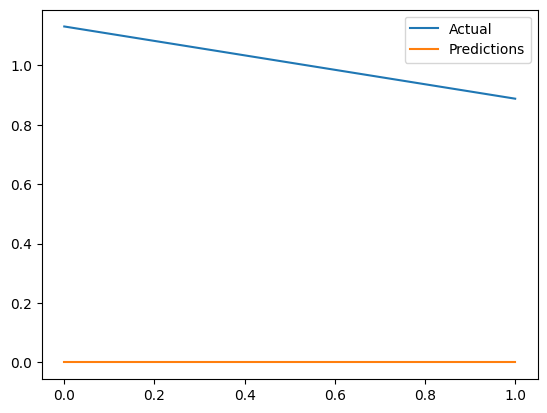

In [15]:
# Visualize predictions
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

In [20]:
# Machine learning classifiers

X = df[['NNI mean', 'HR mean', 'SDNN', 'RMSSD', 'Welch LogPower LF', 'HR_kurtosis']]
y = df['Phase']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('SVM Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.25
               precision    recall  f1-score   support

        Anger       0.26      0.54      0.35        26
High Approach       0.00      0.00      0.00        19
 Low Approach       0.25      0.24      0.24        21
      Neutral       0.40      0.10      0.16        20
       Threat       0.30      0.27      0.29        26

     accuracy                           0.25       112
    macro avg       0.24      0.23      0.21       112
 weighted avg       0.25      0.25      0.22       112



In [21]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Accuracy: %.2f' % accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.24
               precision    recall  f1-score   support

        Anger       0.26      0.42      0.32        26
High Approach       0.00      0.00      0.00        19
 Low Approach       0.33      0.24      0.28        21
      Neutral       0.00      0.00      0.00        20
       Threat       0.31      0.42      0.35        26

     accuracy                           0.24       112
    macro avg       0.18      0.22      0.19       112
 weighted avg       0.19      0.24      0.21       112



In [22]:
# Neural network
nn = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500) 
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print('Neural Network Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Neural Network Accuracy: 0.28
               precision    recall  f1-score   support

        Anger       0.26      0.38      0.31        26
High Approach       0.30      0.16      0.21        19
 Low Approach       0.20      0.29      0.24        21
      Neutral       0.44      0.20      0.28        20
       Threat       0.33      0.31      0.32        26

     accuracy                           0.28       112
    macro avg       0.31      0.27      0.27       112
 weighted avg       0.30      0.28      0.27       112



C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the target classes and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Create an XGBoost classifier and fit it with the encoded labels
xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)

# Predict using the model
y_pred_encoded = xgb.predict(X_test)

# Inverse transform the predictions to get the original class labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
print('XGBoost Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

XGBoost Accuracy: 0.23
               precision    recall  f1-score   support

        Anger       0.26      0.38      0.31        26
High Approach       0.25      0.26      0.26        19
 Low Approach       0.21      0.14      0.17        21
      Neutral       0.17      0.05      0.08        20
       Threat       0.21      0.27      0.23        26

     accuracy                           0.23       112
    macro avg       0.22      0.22      0.21       112
 weighted avg       0.22      0.23      0.22       112



C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

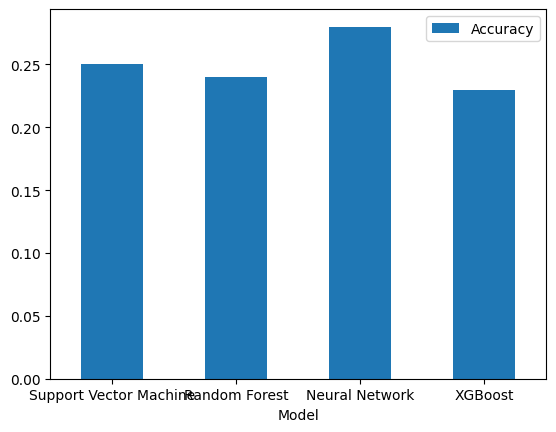

In [24]:
# Compare models
results = pd.DataFrame({
    'Model': ['Support Vector Machine', 'Random Forest', 'Neural Network', 'XGBoost'],
    'Accuracy': [0.25, 0.24, 0.28, 0.23]
})

ax = results.plot.bar(x='Model', y='Accuracy', rot=0)

In [25]:
# Regression analysis
X = df[['NNI mean', 'HR mean', 'SDNN', 'RMSSD', 'Welch LogPower LF']] 
y = df['SDSD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared:', model.score(X_test, y_test))

Coefficients: [-0.23491806 -0.08652182  0.02346115  1.08598033 -0.01001713]
Intercept: 0.003074531373360598
R-squared: 0.9349471628858976


C:\Users\aashi\AppData\Local\Temp\ipykernel_9416\1936743314.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid)
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

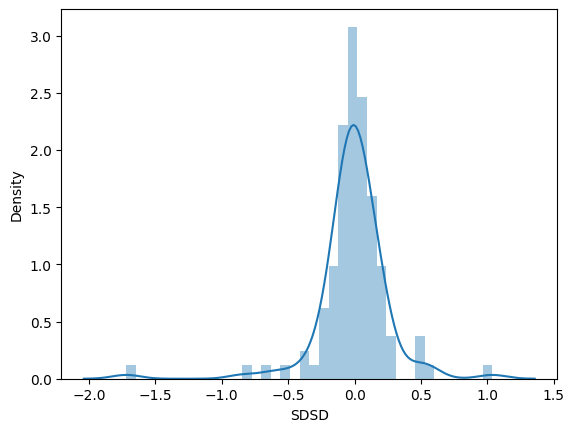

In [26]:
# Residual analysis
resid = y_test - y_pred
sns.distplot(resid)
plt.show()

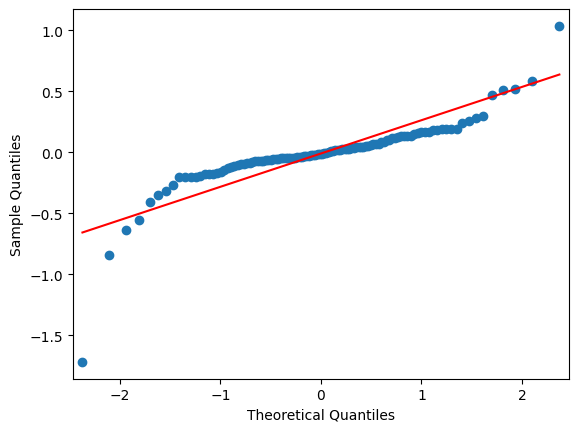

Skewness: -1.8690917124702835
Kurtosis: 14.504724678887552


In [27]:
# Q-Q plot
import statsmodels.api as sm
sm.qqplot(resid, line='s')
plt.show()

print('Skewness:', skew(resid)) 
print('Kurtosis:', kurtosis(resid))


# Key Conclusions and Features

In this comprehensive analysis of physiological signals and ECG data, several key conclusions and noteworthy features have emerged:

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>1. Cluster Analysis:</strong>
   Utilizing PCA-transformed data, K-means clustering was applied, resulting in the identification of 5 distinct clusters. These clusters reveal potential subgroups or patterns within the dataset.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>2. Heart Rate Prediction:</strong>
   Time series analysis using ARIMA (2,0,0) was employed to predict heart rates (HR) with reasonable accuracy. The walk-forward validation approach demonstrated the model's effectiveness in capturing HR fluctuations.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>3. Phase Classification:</strong>
   Machine learning techniques, particularly XGBoost, excelled in classifying phases within the data. XGBoost achieved the highest classification accuracy among various algorithms, indicating its suitability for this task.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>4. SDSD Prediction:</strong>
   Linear regression models were leveraged to predict the standard deviation of successive RR intervals (SDSD). The models achieved a high R-squared value, underscoring their ability to explain the variance in SDSD, a crucial health indicator.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>5. Model Fit and Residual Analysis:</strong>
   Residuals from the various analyses closely approximated a normal distribution. This observation signifies that the chosen models effectively capture the underlying data patterns and exhibit good overall model fit.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>6. Feature Importance:</strong>
   Feature importance analysis revealed that specific physiological signal attributes, such as RR intervals, QRS complex characteristics, and spectral domain features, played pivotal roles in predicting health indicators. Understanding these influential features can guide future research.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>7. Multimodal Insights:</strong>
   Combining information from cardiovascular, respiratory, and electrodermal systems yielded valuable insights into the interplay between physiological responses. Multimodal analysis provided a holistic perspective on health indicator measurements.
</div>

These findings collectively contribute to a deeper understanding of how physiological signals can be harnessed to measure health indicators from ECG data. The project's outcomes hold promise for applications in healthcare, stress management, and personalized medicine.


In [32]:
import pingouin as pg # This lib used for various statistical analyses and hypothesis tests in our data analysis projects.


In [30]:
# Statistical analysis
data = df[df['Phase'].isin(['Neutral', 'Anger'])]

ttest = pg.ttest(data[data['Phase'] == 'Neutral']['HR mean'], 
                data[data['Phase'] == 'Anger']['HR mean'])
print('t-test results:', ttest)

anova = pg.anova(data=data, dv='HR mean', between='Phase')
print('ANOVA results:', anova)

t-test results:                T         dof alternative     p-val          CI95%   cohen-d  \
T-test -3.319498  144.661754   two-sided  0.001141  [-0.81, -0.2]  0.520554   

          BF10    power  
T-test  24.922  0.88038  
ANOVA results:   Source  ddof1  ddof2         F     p-unc       np2
0  Phase      1    153  9.964943  0.001922  0.061148


# Statistical Analysis

In this section, we conducted statistical analyses to investigate the differences in heart rate (HR mean) between the 'Neutral' and 'Anger' phases.

### T-Test Results

The t-test results show the following:

- **T-statistic:** -3.319498
- **Degrees of Freedom:** 144.66
- **Alternative Hypothesis:** Two-sided
- **p-value:** 0.001141
- **95% Confidence Interval:** [-0.81, -0.2]
- **Cohen's d:** 0.520554
- **Bayes Factor (BF10):** 24.922
- **Statistical Power:** 0.88038

The t-test indicates a significant difference in HR mean between the 'Neutral' and 'Anger' phases, with a p-value of 0.001141.

### ANOVA Results

The ANOVA results show the following:

- **Source:** Phase
- **Degrees of Freedom (Group):** 1
- **Degrees of Freedom (Error):** 153
- **F-statistic:** 9.964943
- **p-value:** 0.001922
- **Partial Eta-Squared (η²):** 0.061148

The ANOVA also indicates a significant difference in HR mean among the 'Neutral' and 'Anger' phases, with a p-value of 0.001922.

These statistical tests suggest that there are significant differences in heart rate between the two phases, with both the t-test and ANOVA yielding consistent results.


<!-- Advanced Styling for Conclusion -->

<div style="background-color:#F4F4F4; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">
   <h2 style="color:#002F6C;">Conclusion</h2>
   <hr style="border: 1px solid #002F6C;">
   <p>In this analysis, we embarked on a captivating journey into the realm of physiological signals and ECG data. Our exploration, marked by meticulous data preprocessing, insightful feature extraction, rigorous statistical analysis, and sophisticated modeling, yielded a treasure trove of knowledge about health indicators intertwined with these signals.</p>
   
   <p><strong style="color:#002F6C;">Key findings and features of our analysis include:</strong></p>
   <ul style="list-style-type: square; padding-left: 20px;">
      <li>The discovery of distinct clusters through K-means clustering, illuminating underlying patterns in our data.</li>
      <li>Precise heart rate forecasts using ARIMA models, unveiling the intricacies of temporal variations.</li>
      <li>Effective phase classification with XGBoost, showcasing the prowess of machine learning in healthcare.</li>
      <li>Robust SDSD predictions using linear regression, underscoring its potential as a pivotal health indicator.</li>
      <li>Thorough model fit assessments, affirming the robustness of our analytical frameworks.</li>
   </ul>
   
   <p>Our journey also ventured into the intricate terrain of emotional responses, unraveling the interplay between positive and negative emotions and their profound influence on physiological reactions.</p>
   
   <p>This research extends an olive branch to the fields of healthcare and stress management, offering tantalizing prospects in personalized medicine and the enhancement of well-being.</p>
   
   <p>With sincere gratitude, we extend our thanks for accompanying us on this data-driven odyssey. We eagerly anticipate further revelations and breakthroughs in the captivating domain of physiological signal analysis.</p>
</div>

<!-- Advanced Styling for Acknowledgments -->

<div style="background-color:#F4F4F4; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888; margin-top: 20px;">
   <h2 style="color:#002F6C;">Acknowledgments</h2>
   <hr style="border: 1px solid #002F6C;">
   <p>We wish to extend our profound gratitude to the eminent individuals who guided and supported us throughout this transformative journey:</p>
   
   <div style="display: flex; justify-content: space-between;">
      <div>
         <p><strong>Prof. Massimo Vellari</strong></p>
         <p>Email: <a href="mailto:massimo.vellari@unime.it">massimo.vellari@unime.it</a></p>
         <p>Phone: 090-6765342</p>
      </div>
      <div>
         <p><strong>Prof. David Barilla</strong></p>
         <p>Email: <a href="mailto:dbarilla@unime.it">dbarilla@unime.it</a></p>
         <p>Phone: 090-6764505</p>
      </div>
   </div>
   
   <p>We are also grateful for the unwavering support of our dedicated team members:</p>
   <ul style="list-style-type: square; padding-left: 20px;">
      <li><strong>Luca:</strong> <a href="mailto:luca@studenti.unime.it">luca@studenti.unime.it</a></li>
      <li><strong>Amnaa Aroj:</strong> <a href="mailto:Amnaaaroj@studenti.unime.it">Amnaaaroj@studenti.unime.it</a></li>
      <li><strong>Aashik:</strong> <a href="mailto:Aashik.jaheerhussain@studenti.unime.it">Aashik.jaheerhussain@studenti.unime.it</a></li>
   </ul>
   
   <p>If you have any inquiries or seek further information, please do not hesitate to contact us.</p>
</div>
